In [13]:
import pandas as pd 
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
X_train_origin = pd.read_csv('../data/featured_data/X_train.csv')
y_train_origin = pd.read_csv('../data/featured_data/y_train.csv')

In [3]:
X_train_origin = X_train_origin.to_numpy()
y_train_origin = y_train_origin.to_numpy()
y_train_origin = y_train_origin.ravel()

In [4]:
X_train_origin.shape,y_train_origin.shape

((12096, 50), (12096,))

In [5]:
y_encoded = to_categorical(y_train_origin)
y_encoded = y_encoded[:,1:]
y_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_origin, y_encoded, test_size=0.25, random_state=1) 

In [7]:
input_dim=X_train.shape[1]

In [8]:
model = Sequential()
model.add(Dense(64,input_dim=input_dim ,activation='relu') )
model.add(Dropout(0.3))
model.add(Dense(7,activation='softmax')) 

In [9]:
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt ,loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
epoch = 400

In [11]:
history=model.fit(X_train, y_train,validation_data=(X_val,y_val),batch_size=50, epochs=epoch, verbose=1)

Train on 9072 samples, validate on 3024 samples
Epoch 1/400
9072/9072 [==============================] - 2s 172us/sample - loss: 1.5014 - accuracy: 0.4245 - val_loss: 1.1153 - val_accuracy: 0.6098
Epoch 2/400
9072/9072 [==============================] - 1s 71us/sample - loss: 1.0289 - accuracy: 0.6024 - val_loss: 0.8807 - val_accuracy: 0.6614
Epoch 3/400
9072/9072 [==============================] - 1s 62us/sample - loss: 0.8839 - accuracy: 0.6427 - val_loss: 0.8012 - val_accuracy: 0.6815
Epoch 4/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.8302 - accuracy: 0.6583 - val_loss: 0.7599 - val_accuracy: 0.6921
Epoch 5/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.7930 - accuracy: 0.6736 - val_loss: 0.7330 - val_accuracy: 0.7014
Epoch 6/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.7674 - accuracy: 0.6879 - val_loss: 0.7155 - val_accuracy: 0.7044
Epoch 7/400
9072/9072 [==============================] - 1s 59u

Epoch 56/400
9072/9072 [==============================] - 0s 54us/sample - loss: 0.5287 - accuracy: 0.7799 - val_loss: 0.5375 - val_accuracy: 0.7712
Epoch 57/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.5346 - accuracy: 0.7815 - val_loss: 0.5343 - val_accuracy: 0.7741
Epoch 58/400
9072/9072 [==============================] - 1s 59us/sample - loss: 0.5310 - accuracy: 0.7794 - val_loss: 0.5368 - val_accuracy: 0.7768
Epoch 59/400
9072/9072 [==============================] - 1s 60us/sample - loss: 0.5295 - accuracy: 0.7805 - val_loss: 0.5316 - val_accuracy: 0.7755
Epoch 60/400
9072/9072 [==============================] - 1s 62us/sample - loss: 0.5250 - accuracy: 0.7882 - val_loss: 0.5322 - val_accuracy: 0.7738
Epoch 61/400
9072/9072 [==============================] - 1s 71us/sample - loss: 0.5339 - accuracy: 0.7777 - val_loss: 0.5290 - val_accuracy: 0.7794
Epoch 62/400
9072/9072 [==============================] - 1s 71us/sample - loss: 0.5253 - accuracy: 0.7858

Epoch 111/400
9072/9072 [==============================] - 1s 59us/sample - loss: 0.4843 - accuracy: 0.8019 - val_loss: 0.5097 - val_accuracy: 0.7887
Epoch 112/400
9072/9072 [==============================] - 1s 60us/sample - loss: 0.4913 - accuracy: 0.8011 - val_loss: 0.5037 - val_accuracy: 0.7890
Epoch 113/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.4840 - accuracy: 0.8042 - val_loss: 0.5024 - val_accuracy: 0.7956
Epoch 114/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4845 - accuracy: 0.8007 - val_loss: 0.5065 - val_accuracy: 0.7917
Epoch 115/400
9072/9072 [==============================] - 0s 54us/sample - loss: 0.4826 - accuracy: 0.8061 - val_loss: 0.5095 - val_accuracy: 0.7923
Epoch 116/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4801 - accuracy: 0.8045 - val_loss: 0.5088 - val_accuracy: 0.7920
Epoch 117/400
9072/9072 [==============================] - 1s 55us/sample - loss: 0.4848 - accuracy:

9072/9072 [==============================] - 1s 59us/sample - loss: 0.4658 - accuracy: 0.8100 - val_loss: 0.4967 - val_accuracy: 0.8026
Epoch 166/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.4702 - accuracy: 0.8072 - val_loss: 0.4952 - val_accuracy: 0.7996
Epoch 167/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4695 - accuracy: 0.8073 - val_loss: 0.4963 - val_accuracy: 0.8006
Epoch 168/400
9072/9072 [==============================] - 1s 60us/sample - loss: 0.4671 - accuracy: 0.8108 - val_loss: 0.4958 - val_accuracy: 0.7963
Epoch 169/400
9072/9072 [==============================] - 1s 64us/sample - loss: 0.4654 - accuracy: 0.8106 - val_loss: 0.4985 - val_accuracy: 0.8026
Epoch 170/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4581 - accuracy: 0.8110 - val_loss: 0.5004 - val_accuracy: 0.8006
Epoch 171/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4585 - accuracy: 0.8146 - val_

Epoch 220/400
9072/9072 [==============================] - 1s 55us/sample - loss: 0.4507 - accuracy: 0.8172 - val_loss: 0.4924 - val_accuracy: 0.8049
Epoch 221/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4453 - accuracy: 0.8183 - val_loss: 0.4884 - val_accuracy: 0.8056
Epoch 222/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4550 - accuracy: 0.8116 - val_loss: 0.4942 - val_accuracy: 0.8016
Epoch 223/400
9072/9072 [==============================] - 0s 55us/sample - loss: 0.4556 - accuracy: 0.8144 - val_loss: 0.4900 - val_accuracy: 0.8059
Epoch 224/400
9072/9072 [==============================] - 0s 54us/sample - loss: 0.4497 - accuracy: 0.8160 - val_loss: 0.4911 - val_accuracy: 0.8065
Epoch 225/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4455 - accuracy: 0.8176 - val_loss: 0.4927 - val_accuracy: 0.8069
Epoch 226/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4551 - accuracy:

9072/9072 [==============================] - 1s 55us/sample - loss: 0.4418 - accuracy: 0.8189 - val_loss: 0.4871 - val_accuracy: 0.8052
Epoch 275/400
9072/9072 [==============================] - 0s 53us/sample - loss: 0.4435 - accuracy: 0.8172 - val_loss: 0.4886 - val_accuracy: 0.8069
Epoch 276/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4422 - accuracy: 0.8119 - val_loss: 0.4875 - val_accuracy: 0.8082
Epoch 277/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4374 - accuracy: 0.8233 - val_loss: 0.4884 - val_accuracy: 0.8075
Epoch 278/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4502 - accuracy: 0.8225 - val_loss: 0.4882 - val_accuracy: 0.8115
Epoch 279/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.4408 - accuracy: 0.8191 - val_loss: 0.4909 - val_accuracy: 0.8049
Epoch 280/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4467 - accuracy: 0.8155 - val_

Epoch 329/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4359 - accuracy: 0.8235 - val_loss: 0.4899 - val_accuracy: 0.8072
Epoch 330/400
9072/9072 [==============================] - 1s 59us/sample - loss: 0.4364 - accuracy: 0.8169 - val_loss: 0.4925 - val_accuracy: 0.8072
Epoch 331/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4392 - accuracy: 0.8212 - val_loss: 0.4928 - val_accuracy: 0.8089
Epoch 332/400
9072/9072 [==============================] - 0s 52us/sample - loss: 0.4386 - accuracy: 0.8212 - val_loss: 0.4913 - val_accuracy: 0.8069
Epoch 333/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.4351 - accuracy: 0.8221 - val_loss: 0.4898 - val_accuracy: 0.8115
Epoch 334/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4377 - accuracy: 0.8203 - val_loss: 0.4907 - val_accuracy: 0.8075
Epoch 335/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4310 - accuracy:

9072/9072 [==============================] - 0s 54us/sample - loss: 0.4280 - accuracy: 0.8263 - val_loss: 0.4905 - val_accuracy: 0.8069
Epoch 384/400
9072/9072 [==============================] - 1s 55us/sample - loss: 0.4291 - accuracy: 0.8228 - val_loss: 0.4891 - val_accuracy: 0.8006
Epoch 385/400
9072/9072 [==============================] - 1s 58us/sample - loss: 0.4282 - accuracy: 0.8240 - val_loss: 0.4897 - val_accuracy: 0.8022
Epoch 386/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4239 - accuracy: 0.8253 - val_loss: 0.4892 - val_accuracy: 0.8039
Epoch 387/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4309 - accuracy: 0.8261 - val_loss: 0.4901 - val_accuracy: 0.8085
Epoch 388/400
9072/9072 [==============================] - 1s 56us/sample - loss: 0.4290 - accuracy: 0.8285 - val_loss: 0.4931 - val_accuracy: 0.8062
Epoch 389/400
9072/9072 [==============================] - 1s 57us/sample - loss: 0.4323 - accuracy: 0.8210 - val_

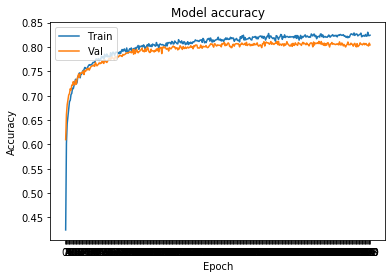

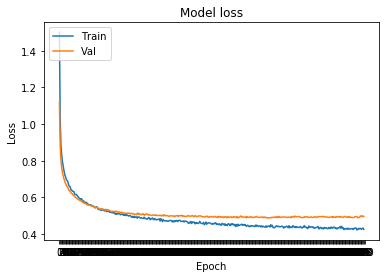

In [12]:
epoch_range=range(1,epoch+1)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# worse than RF, acc = 0.8 in val

In [15]:
model.save("../models/NN.h5")